In [1]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第3位まで表示
%precision 3

# ランダムシードの固定
np.random.seed(0)

In [2]:
dice_data = np.array([1,2,3,4,5,6])

In [3]:
print("1つだけランダムに抽出: ", np.random.choice(dice_data, 1))

1つだけランダムに抽出:  [5]


In [5]:
#サイコロを1000回振る
calc_steps = 1000

dice_rolls = np.random.choice(dice_data, calc_steps)

for i in range(1, 7):
    probability = len(dice_rolls[dice_rolls == i])/ calc_steps
    print(i, "が出る確率 = ", probability)

1 が出る確率 =  0.164
2 が出る確率 =  0.166
3 が出る確率 =  0.17
4 が出る確率 =  0.178
5 が出る確率 =  0.159
6 が出る確率 =  0.163


In [6]:
coin_data = np.array([0,1])
coin_steps = 1000
coin_rolls = np.random.choice(coin_data, coin_steps)
for i in range(0, 2):
    probability = len(coin_rolls[coin_rolls == i])/ coin_steps
    print(i, "が出る確率 = :", probability)

0 が出る確率 = : 0.483
1 が出る確率 = : 0.517


1 が出る確率 =  0.198
2 が出る確率 =  0.179
3 が出る確率 =  0.152
4 が出る確率 =  0.144
5 が出る確率 =  0.164
6 が出る確率 =  0.163


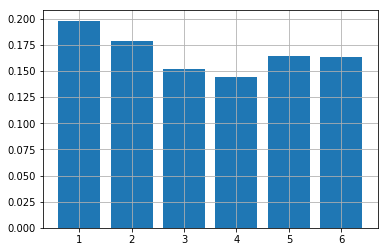

In [8]:
#一様分布
#サイコロを1000回振る
calc_steps = 1000

dice_rolls = np.random.choice(dice_data, calc_steps)

prob_data = np.array([])
for i in range(1, 7):
    probability = len(dice_rolls[dice_rolls == i])/ calc_steps
    print(i, "が出る確率 = ", probability)
    prob_data = np.append(prob_data, len(dice_rolls[dice_rolls == i])/ calc_steps)

plt.bar(dice_data, prob_data)
plt.grid(True)

0 が出る確率 =  0.625
1 が出る確率 =  0.375


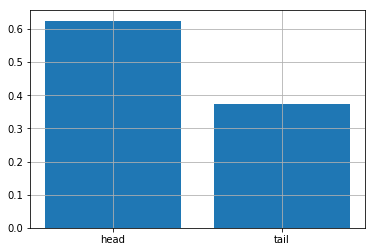

In [9]:
#ベルヌーイ分布
#サンプル数8の場合

prob_be_data = np.array([])
coin_data = np.array([0,0,0,0,0,1,1,1])

for i in np.unique(coin_data):
    p = len(coin_data[coin_data == i])/ len(coin_data)
    print(i, "が出る確率 = ", p)
    prob_be_data = np.append(prob_be_data, p)

plt.bar([0,1], prob_be_data, align='center')
plt.xticks([0,1], ["head", "tail"])
plt.grid(True)

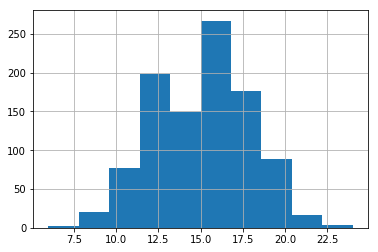

In [10]:
# 二項分布
np.random.seed(0)
x = np.random.binomial(30, 0.5, 1000)
plt.hist(x)
plt.grid(True)

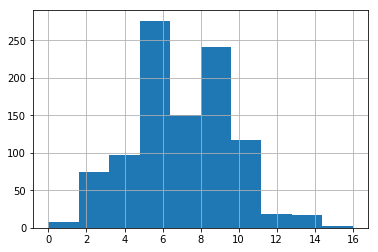

In [11]:
# ポアソン分布
x = np.random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

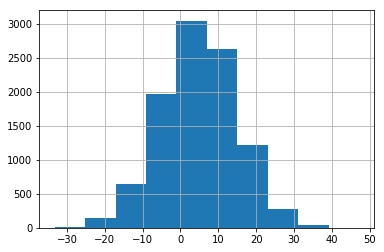

In [12]:
# 正規分布
# np.random.normal(平均、標準偏差、サンプル数)
x = np.random.normal(5, 10, 10000)
plt.hist(x)
plt.grid(True)

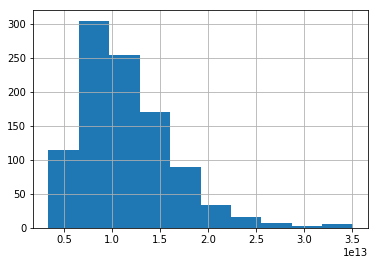

In [13]:
# 対数正規分布
x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)

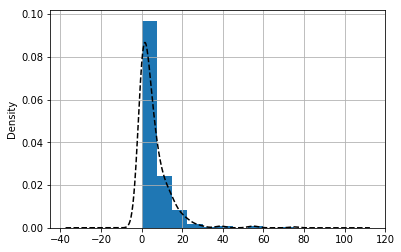

In [14]:
# 注：ここはデータを取得していれば、実行しなくて大丈夫です。
import requests
import zipfile
from io import StringIO
import io

zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

# データを読み込む
student_data_math = pd.read_csv('student-mat.csv', sep=';')

# カーネル密度関数
student_data_math.absences.plot(kind='kde', style='k--')

# 単純なヒストグラム、density=Trueにすることで、確率で表示
student_data_math.absences.hist(density=True)
plt.grid(True)

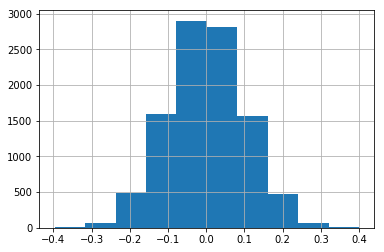

In [17]:
N = 10000
x = [np.random.normal(0, 1, 100).mean() for _ in range(N)]
plt.hist(x)
plt.grid(True)

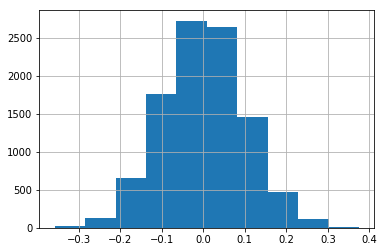

In [16]:
# 解答
N = 10000
# normal version
normal_sample_data = [np.random.normal(0, 1, 100).mean() for _ in range(N)]

plt.hist(normal_sample_data)
plt.grid(True)

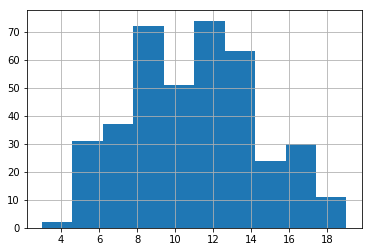

In [22]:
student_data_math = pd.read_csv('student-mat.csv', sep=';')
plt.hist(student_data_math.G1)
plt.grid(True)

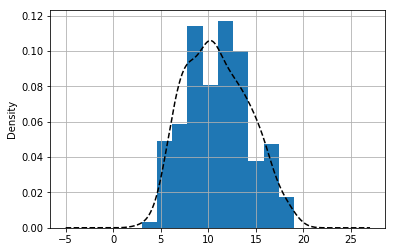

In [23]:
student_data_math.G1.plot(kind='kde',style='k--')
plt.grid(True)

student_data_math.G1.hist(density = True)
plt.grid(True)

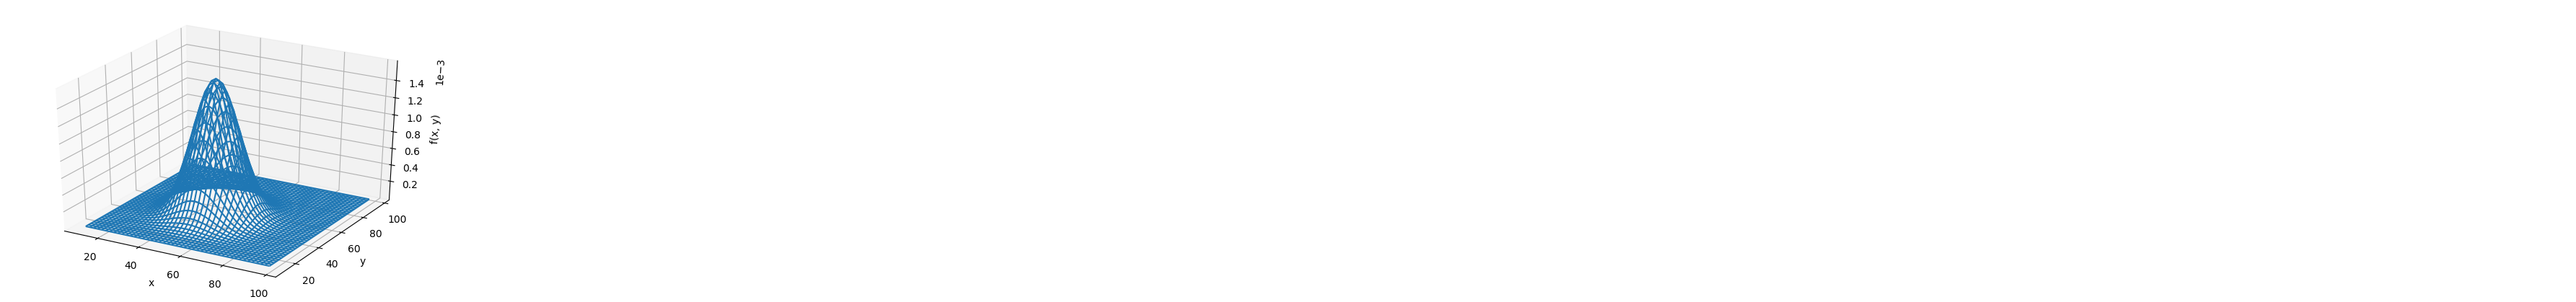

In [24]:
# 必要なライブラリの読み込み
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# データの設定
x, y = np.mgrid[10:100:2, 10:100:2]

pos = np.empty(x.shape + (2, ))

pos[:, :, 0] = x 
pos[:, :, 1] = y 

# 多次元正規分布
# それぞれの変数の平均と分散共分散行列を設定
# 以下の例では、xとyの平均がそれぞれ50と50、[[100, 0], [0, 100]]がxとyの共分散行列になります
rv = multivariate_normal([50, 50], [[100, 0], [0, 100]])

# 確率密度関数
z = rv.pdf(pos)

fig = plt.figure(dpi=100)

ax = Axes3D(fig)
ax.plot_wireframe(x, y, z)

# x,y,zラベルの設定など
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

# z軸の表示目盛り単位を変更、sciが指数表示、axisで軸を指定、scilimits=(n,m)はnからmの外にあるものは指数表記
# scilimits=(0,0)はすべて指数表記にするという意味
ax.ticklabel_format(style='sci', axis='z', scilimits=(0, 0))

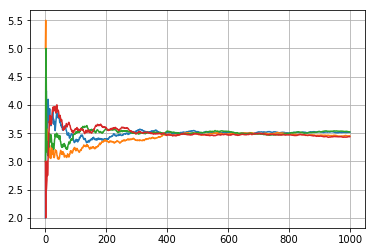

In [28]:
# 大数の法則

# 計算回数
calc_times =1000
# サイコロ
sample_array = np.array([1, 2, 3, 4, 5, 6])
number_cnt = np.arange(1, calc_times + 1)

# 4つのパスを生成
for i in range(4):
    p = np.random.choice(sample_array, calc_times).cumsum()
    plt.plot(p / number_cnt)
    plt.grid(True)

In [29]:
# 中心極限定理
def function_central_theory(N):
    
    sample_array = np.array([1, 2, 3, 4, 5, 6])
    numaber_cnt = np.arange(1, N + 1) * 1.0
 
    mean_array = np.array([])
 
    for i in range(1000):   
        cum_variables = np.random.choice(sample_array, N).cumsum()*1.0
        mean_array = np.append(mean_array, cum_variables[N-1] / N)
 
    plt.hist(mean_array)
    plt.grid(True)

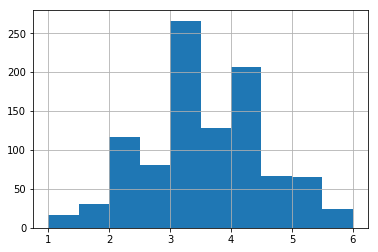

In [31]:
function_central_theory(3)

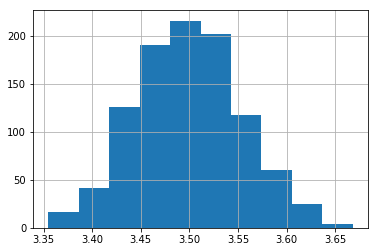

In [32]:
function_central_theory(10**3)

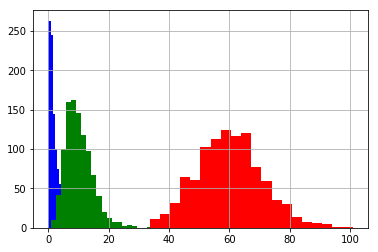

In [33]:
# カイ2乗分布
# 自由度2, 10, 60に従うカイ二乗分布が生成する乱数のヒストグラム
for df, c in zip([2, 10, 60], 'bgr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)
    plt.grid(True)

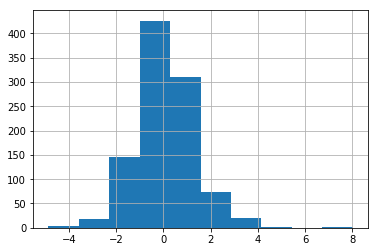

In [34]:
# t分布
x = np.random.standard_t(5, 1000)
plt.hist(x)
plt.grid(True)

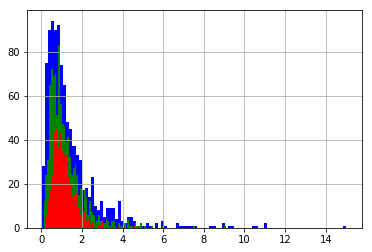

In [35]:
# F 分布
for df, c in zip([ (6, 7), (10, 10), (20, 25)], 'bgr'):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)
    plt.grid(True)

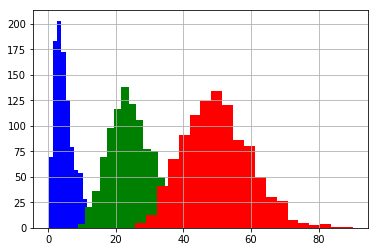

In [36]:
for df, c in zip([5, 25, 50], 'bgr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 20, color = c)
    plt.grid(True)

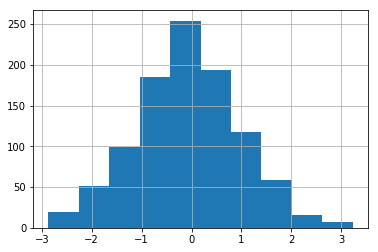

In [37]:
x = np.random.standard_t(100, 1000)
plt.hist(x)
plt.grid(True)

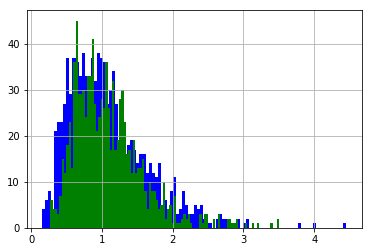

In [38]:
for df, c in zip([(10, 30), (20, 25)], "bg"):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color = c)
    plt.grid(True)

In [43]:
#統計的検定
student_data_math = pd.read_csv("student-mat.csv", sep = ";")
student_data_por = pd.read_csv("student-por.csv", sep = ";")

#マージ
student_data_merge = pd.merge(student_data_math,
                              student_data_por,
                              on = [
                                  "school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob",
                                  "reason", "nursery", "internet"
                              ],
                              suffixes = ("_math", "_por")                              
)
print("G1数学の成績平均: ", student_data_merge.G1_math.mean())
print("G1ポルトガル語の成績平均: ", student_data_merge.G1_por.mean())


G1数学の成績平均:  10.861256544502618
G1ポルトガル語の成績平均:  12.112565445026178


In [45]:
from scipy import stats
t, p = stats.ttest_rel(student_data_merge.G1_math, student_data_merge.G1_por)
print("p値 = ", p)

p値 =  1.6536555217100788e-16


In [ ]:
t, p = stats.ttest_rel(student_data_merge.G1_math, student_data_merge.G1_por)
print("p値 = ", p)